* This notebook is for generating labels from test output.
* This notebook has to be run after generating model output with test data.
* This generates the final submission file and also some charts.
* Assumption - Needs following dir structure
* Directory structure - 
   *  ../data - top layer directory for images
   *  ../data/train_v2.csv  - csv file for training images
   *  ../data/train-jpg - dir for training images
   *  ../data/test-jpg -  dir for testing images
   *  ../data/test-jpg-additional - dir for additional testing images

In [1]:
import pickle
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import os
from itertools import chain
from pprint import pprint

In [16]:
data_root_folder = os.path.abspath("../data/")
train_root_dir=os.path.join(data_root_folder, 'train-jpg')
train_csv_file = os.path.join(data_root_folder, 'train_v2.csv')

In [17]:
"""
This routine makes a dictionary of all unique and sorted labels.
The labels are entered as values with  corresponding indexs as keys. 
"""
def make_label_map():

    train_csv_file = os.path.join(data_root_folder, 'train_v2.csv')
    
    train_csv_df = pd.read_csv(train_csv_file)

    #print (train_csv_df.head())

    labels = sorted(set(chain.from_iterable([tags.split(" ") for tags in train_csv_df['tags'].values])))

    #print (labels)

    label_map = dict()

    for index, label in enumerate(labels):
        label_map[index] = label

    
    return label_map

label_map = make_label_map()
pprint(label_map)

{0: 'agriculture',
 1: 'artisinal_mine',
 2: 'bare_ground',
 3: 'blooming',
 4: 'blow_down',
 5: 'clear',
 6: 'cloudy',
 7: 'conventional_mine',
 8: 'cultivation',
 9: 'habitation',
 10: 'haze',
 11: 'partly_cloudy',
 12: 'primary',
 13: 'road',
 14: 'selective_logging',
 15: 'slash_burn',
 16: 'water'}


In [5]:
"""
This cell will open the result pickle file and load into two arrays
one for the filenames and other for actual predictions
"""

start = 0
end = 62

pickle_filename = 'result.{}.{}.p'.format(start, end)                             
print 'pickle_filename = ', pickle_filename   
filenames, predictions = pickle.load(open(pickle_filename, mode='rb'))

print("Predictions shape: {}\nFiles name shape: {}\n First predictions entry:\n{}".format(np.array(predictions).shape, 
                                                                              np.array(filenames).shape,
                                                                              predictions[0]))


pickle_filename =  result.0.62.p
Predictions shape: (61191, 17)
Files name shape: (61191,)
 First predictions entry:
[  4.20346949e-03   2.41395901e-05   2.65703711e-04   1.92860817e-03
   1.62697368e-04   9.98997688e-01   8.19476409e-05   1.79737635e-05
   1.84694142e-03   1.26469531e-03   6.50172937e-04   4.54346184e-04
   9.99822497e-01   1.68052374e-03   2.46240466e-04   4.89457852e-05
   4.27385699e-03]


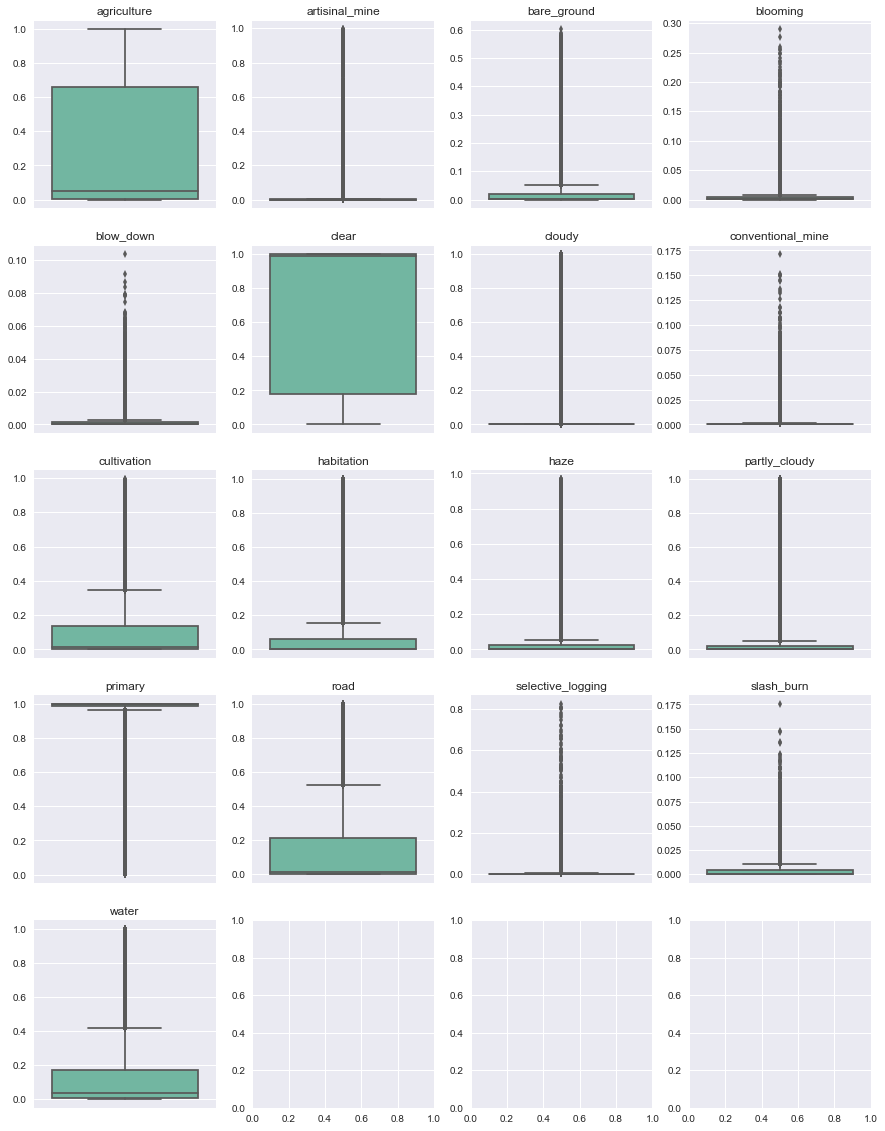

In [6]:
"""
This code block will box-plot the prediction values for each labels
"""

tags_pred = np.array(predictions).T
_, axs = plt.subplots(5, 4, figsize=(15, 20))
axs = axs.ravel()

for i, tag_vals in enumerate(tags_pred):
    sns.boxplot(tag_vals, orient='v', palette='Set2', ax=axs[i]).set_title(label_map[i])
    
plt.show()

In [7]:
"""
This routine will convert prediction to corresponding label names based on a threshold
If the value of prediction is greater than threshold then the label is produced
"""
def predict_labels(predictions, label_map, thresholds):
    
    pred_labels = []
    
    for prediction_vector in predictions:
        labels = []
        for i, value in enumerate(prediction_vector):
            if value > thresholds[i]:
                labels.append(label_map[i])
        print labels
        pred_labels.append(labels)
        
    return pred_labels

In [8]:
"""
This block will load the threshold value and convert the prediction to labels 
by calling above function predict_labels()
"""
thresholds = [0.2] * len(label_map)
predicted_labels = predict_labels(predictions, label_map, thresholds)

['clear', 'primary']
['agriculture', 'clear', 'cultivation', 'primary']
['clear', 'primary']
['clear', 'primary']
['cloudy']
['clear', 'haze', 'primary']
['agriculture', 'clear', 'cultivation', 'primary']
['clear', 'cloudy', 'water']
['clear', 'primary']
['partly_cloudy', 'primary']
['agriculture', 'partly_cloudy', 'primary', 'water']
['partly_cloudy', 'primary']
['agriculture', 'clear', 'primary', 'road']
['clear', 'primary']
['agriculture', 'cultivation', 'partly_cloudy', 'primary']
['partly_cloudy', 'primary']
['clear', 'primary']
['agriculture', 'clear', 'habitation', 'haze', 'primary', 'road', 'water']
['clear', 'primary']
['agriculture', 'clear', 'primary', 'road']
['agriculture', 'cultivation', 'partly_cloudy', 'primary', 'road']
['partly_cloudy', 'primary']
['partly_cloudy', 'primary']
['clear', 'primary']
['clear', 'primary']
['partly_cloudy', 'primary']
['clear', 'primary']
['agriculture', 'cultivation', 'partly_cloudy', 'primary', 'road', 'water']
['agriculture', 'clear', 'c

['agriculture', 'clear', 'primary', 'road', 'water']
['agriculture', 'haze', 'partly_cloudy', 'primary', 'water']
['clear', 'primary']
['clear', 'primary', 'road', 'water']
['clear', 'primary']
['clear', 'primary']
['clear', 'haze', 'primary']
['agriculture', 'partly_cloudy', 'primary', 'road', 'water']
['agriculture', 'partly_cloudy', 'primary', 'road']
['agriculture', 'clear', 'cultivation', 'primary', 'road']
['agriculture', 'clear', 'haze', 'primary', 'road', 'water']
['agriculture', 'clear', 'habitation', 'haze', 'primary', 'road', 'water']
['agriculture', 'clear', 'cultivation', 'habitation', 'primary', 'road']
['clear', 'primary']
['agriculture', 'clear', 'cultivation', 'primary']
['clear', 'primary']
['agriculture', 'clear', 'cultivation', 'partly_cloudy', 'primary', 'road']
['clear', 'habitation', 'primary', 'road']
['agriculture', 'clear', 'habitation', 'primary', 'road', 'water']
['agriculture', 'clear', 'habitation', 'haze', 'primary', 'road', 'water']
['clear', 'primary']


['clear', 'primary']
['agriculture', 'clear', 'primary']
['partly_cloudy', 'primary']
['clear', 'primary']
['clear', 'haze', 'primary']
['clear', 'primary']
['clear', 'primary']
['agriculture', 'clear', 'cultivation', 'primary', 'road']
['agriculture', 'clear', 'haze', 'primary', 'road', 'water']
['clear', 'primary', 'water']
['partly_cloudy', 'primary']
['clear', 'primary']
['clear', 'haze', 'primary', 'water']
['haze', 'primary']
['clear', 'primary']
['clear', 'primary', 'water']
['clear', 'partly_cloudy', 'primary']
['clear', 'primary']
['agriculture', 'cultivation', 'partly_cloudy', 'primary', 'water']
['clear', 'primary']
['agriculture', 'clear', 'primary', 'road', 'water']
['agriculture', 'clear', 'cultivation', 'partly_cloudy', 'primary', 'water']
['agriculture', 'clear', 'cultivation', 'habitation', 'primary', 'road', 'water']
['clear', 'primary']
['clear', 'primary']
['agriculture', 'clear', 'primary', 'water']
['agriculture', 'clear', 'cultivation', 'primary']
['agriculture',

['clear', 'primary']
['clear', 'primary']
['clear', 'primary']
['agriculture', 'clear', 'primary', 'road']
['agriculture', 'bare_ground', 'clear', 'primary', 'road']
['clear', 'primary']
['clear', 'primary']
['agriculture', 'clear', 'cultivation', 'primary']
['agriculture', 'clear', 'cultivation', 'primary']
['clear', 'cloudy', 'water']
['partly_cloudy', 'primary']
['agriculture', 'cultivation', 'haze', 'primary']
['agriculture', 'clear', 'cultivation', 'haze', 'primary', 'road']
['agriculture', 'clear', 'habitation', 'primary', 'road']
['clear', 'primary', 'selective_logging']
['agriculture', 'clear', 'primary', 'water']
['agriculture', 'clear', 'primary', 'road', 'water']
['agriculture', 'partly_cloudy', 'primary', 'road', 'water']
['clear', 'cloudy', 'water']
['agriculture', 'clear', 'cultivation', 'habitation', 'primary', 'road']
['clear', 'primary']
['agriculture', 'clear', 'cultivation', 'habitation', 'primary', 'road']
['haze', 'primary']
['agriculture', 'clear', 'cultivation', 

['agriculture', 'partly_cloudy', 'primary']
['agriculture', 'clear', 'primary']
['clear', 'primary']
['agriculture', 'clear', 'primary', 'water']
['clear', 'primary']
['clear', 'primary']
['agriculture', 'clear', 'primary', 'road', 'water']
['clear', 'primary']
['partly_cloudy', 'primary']
['clear', 'primary']
['haze', 'primary']
['agriculture', 'partly_cloudy', 'primary', 'water']
['agriculture', 'clear', 'cultivation', 'primary']
['clear', 'primary', 'water']
['clear', 'primary']
['agriculture', 'clear', 'cultivation', 'primary', 'water']
['agriculture', 'haze', 'primary', 'road', 'water']
['agriculture', 'clear', 'primary']
['clear', 'haze', 'primary']
['agriculture', 'clear', 'cultivation', 'primary']
['clear', 'primary']
['agriculture', 'clear', 'primary', 'road']
['clear', 'primary', 'water']
['agriculture', 'bare_ground', 'clear', 'primary', 'road']
['agriculture', 'partly_cloudy', 'primary', 'road']
['agriculture', 'clear', 'habitation', 'primary', 'road']
['clear', 'partly_clo

['agriculture', 'clear', 'habitation', 'primary', 'road']
['agriculture', 'clear', 'cultivation', 'habitation', 'primary', 'road']
['clear', 'primary']
['clear', 'primary']
['agriculture', 'cultivation', 'partly_cloudy', 'primary', 'road']
['agriculture', 'cultivation', 'habitation', 'partly_cloudy', 'primary', 'road']
['agriculture', 'clear', 'cultivation', 'habitation', 'primary', 'road']
['agriculture', 'clear', 'habitation', 'primary', 'road']
['agriculture', 'clear', 'cultivation', 'primary']
['clear', 'primary', 'water']
['agriculture', 'clear', 'haze', 'primary', 'road']
['agriculture', 'clear', 'cultivation', 'habitation', 'primary', 'road']
['agriculture', 'habitation', 'partly_cloudy', 'primary', 'road']
['agriculture', 'partly_cloudy', 'primary']
['partly_cloudy', 'primary']
['clear', 'primary']
['cloudy', 'haze', 'primary']
['clear', 'primary']
['clear', 'primary']
['clear', 'primary']
['partly_cloudy', 'primary']
['clear', 'primary']
['partly_cloudy', 'primary', 'water']
[

['clear', 'primary', 'road', 'water']
['agriculture', 'clear', 'habitation', 'primary', 'road']
['agriculture', 'clear', 'habitation', 'primary', 'road']
['clear', 'primary']
['clear', 'primary', 'water']
['agriculture', 'haze', 'primary', 'road', 'water']
['haze', 'primary']
['agriculture', 'clear', 'haze', 'partly_cloudy', 'primary', 'road']
['clear', 'primary']
['agriculture', 'clear', 'haze', 'primary', 'road', 'water']
['clear', 'primary']
['agriculture', 'cultivation', 'partly_cloudy', 'primary']
['agriculture', 'habitation', 'partly_cloudy', 'primary', 'road']
['cloudy', 'primary']
['clear', 'primary']
['clear', 'primary']
['agriculture', 'clear', 'haze', 'primary', 'road']
['clear', 'primary', 'road', 'selective_logging']
['clear', 'primary', 'water']
['agriculture', 'clear', 'habitation', 'primary', 'road']
['clear', 'primary', 'water']
['clear', 'partly_cloudy', 'primary']
['agriculture', 'bare_ground', 'clear', 'primary', 'road']
['agriculture', 'clear', 'haze', 'primary', '

['agriculture', 'clear', 'cultivation', 'primary']
['clear', 'primary']
['agriculture', 'bare_ground', 'clear', 'primary']
['clear', 'primary']
['clear', 'cloudy', 'water']
['agriculture', 'clear', 'cultivation', 'primary']
['clear', 'primary', 'water']
['agriculture', 'partly_cloudy', 'primary', 'road']
['clear', 'primary', 'water']
['agriculture', 'partly_cloudy', 'primary', 'road']
['clear', 'primary']
['agriculture', 'cultivation', 'partly_cloudy', 'primary']
['clear', 'primary']
['clear', 'habitation', 'primary', 'road']
['cloudy']
['agriculture', 'haze', 'primary', 'water']
['clear', 'primary']
['clear', 'primary']
['agriculture', 'cultivation', 'partly_cloudy', 'primary']
['clear', 'habitation', 'primary', 'road']
['agriculture', 'clear', 'primary', 'road', 'water']
['partly_cloudy', 'primary']
['agriculture', 'clear', 'habitation', 'primary', 'road', 'water']
['clear', 'primary']
['clear', 'primary', 'water']
['clear', 'primary']
['clear', 'primary']
['clear', 'primary']
['agri

['clear', 'primary']
['clear', 'primary']
['agriculture', 'partly_cloudy', 'primary', 'road']
['agriculture', 'clear', 'haze', 'primary', 'road', 'water']
['cloudy']
['clear', 'cloudy', 'water']
['agriculture', 'clear', 'habitation', 'primary', 'road']
['partly_cloudy', 'primary']
['clear', 'primary']
['haze', 'partly_cloudy', 'primary']
['agriculture', 'clear', 'primary', 'road']
['haze', 'primary']
['agriculture', 'clear', 'haze', 'primary', 'water']
['clear', 'primary']
['clear', 'primary']
['clear', 'primary']
['agriculture', 'clear', 'cultivation', 'habitation', 'primary', 'road', 'water']
['blooming', 'clear', 'primary', 'selective_logging']
['agriculture', 'clear', 'primary', 'water']
['agriculture', 'clear', 'cultivation', 'habitation', 'primary', 'road']
['clear', 'primary', 'water']
['haze', 'primary']
['clear', 'habitation', 'primary', 'road']
['partly_cloudy', 'primary']
['clear', 'primary']
['clear', 'haze', 'primary', 'water']
['clear', 'primary']
['agriculture', 'clear',

['clear', 'primary']
['clear', 'primary']
['cloudy', 'haze', 'primary']
['agriculture', 'clear', 'primary', 'road', 'water']
['clear', 'primary']
['clear', 'primary']
['agriculture', 'clear', 'cloudy', 'primary', 'water']
['clear', 'primary']
['cloudy']
['clear', 'primary']
['agriculture', 'clear', 'cultivation', 'habitation', 'primary', 'road']
['partly_cloudy', 'primary']
['agriculture', 'cultivation', 'partly_cloudy', 'primary']
['agriculture', 'haze', 'primary', 'water']
['partly_cloudy', 'primary']
['agriculture', 'clear', 'cultivation', 'primary']
['partly_cloudy', 'primary']
['agriculture', 'clear', 'cultivation', 'primary']
['haze', 'primary']
['agriculture', 'clear', 'primary', 'water']
['partly_cloudy', 'primary']
['agriculture', 'clear', 'habitation', 'primary', 'road']
['partly_cloudy', 'primary']
['clear', 'primary']
['agriculture', 'clear', 'primary', 'road']
['agriculture', 'clear', 'cultivation', 'habitation', 'primary', 'road']
['agriculture', 'clear', 'cultivation', '

['agriculture', 'clear', 'primary', 'road']
['agriculture', 'partly_cloudy', 'primary']
['agriculture', 'clear', 'primary']
['clear', 'primary', 'water']
['agriculture', 'partly_cloudy', 'primary', 'water']
['agriculture', 'cultivation', 'partly_cloudy', 'primary']
['clear', 'primary']
['partly_cloudy', 'primary']
['partly_cloudy', 'primary']
['clear', 'primary']
['cloudy']
['clear', 'primary', 'water']
['clear', 'primary', 'water']
['agriculture', 'clear', 'cultivation', 'primary']
['clear', 'primary', 'water']
['partly_cloudy', 'primary']
['clear', 'primary']
['clear', 'primary']
['agriculture', 'clear', 'cultivation', 'primary']
['agriculture', 'clear', 'primary', 'road', 'water']
['artisinal_mine', 'clear', 'primary', 'water']
['clear', 'primary']
['agriculture', 'clear', 'habitation', 'primary', 'road']
['clear', 'primary']
['clear', 'primary']
['partly_cloudy', 'primary']
['clear', 'primary']
['partly_cloudy', 'primary']
['agriculture', 'partly_cloudy', 'primary', 'road', 'water'

['clear', 'primary']
['agriculture', 'clear', 'primary', 'road']
['cloudy', 'haze', 'partly_cloudy', 'primary']
['agriculture', 'partly_cloudy', 'primary']
['partly_cloudy', 'primary']
['agriculture', 'clear', 'habitation', 'primary', 'road']
['partly_cloudy', 'primary']
['agriculture', 'clear', 'haze', 'primary', 'road']
['clear', 'primary']
['clear', 'primary']
['clear', 'primary']
['clear', 'primary']
['cloudy', 'haze', 'primary', 'water']
['cloudy']
['clear', 'primary', 'water']
['cloudy', 'partly_cloudy', 'primary']
['clear', 'primary']
['agriculture', 'clear', 'cultivation', 'habitation', 'primary', 'road', 'water']
['clear', 'primary']
['clear', 'primary']
['clear', 'primary']
['clear', 'primary']
['agriculture', 'clear', 'primary', 'road', 'water']
['agriculture', 'bare_ground', 'clear', 'primary', 'road']
['cloudy']
['cloudy', 'haze', 'primary']
['agriculture', 'clear', 'habitation', 'primary', 'road', 'water']
['clear', 'primary']
['agriculture', 'clear', 'cultivation', 'prim

['partly_cloudy', 'primary']
['clear', 'primary']
['agriculture', 'clear', 'habitation', 'primary', 'road', 'water']
['agriculture', 'clear', 'primary', 'water']
['clear', 'primary']
['clear', 'primary']
['clear', 'primary']
['clear', 'primary']
['clear', 'primary', 'water']
['agriculture', 'partly_cloudy', 'primary', 'road']
['clear', 'haze', 'primary']
['agriculture', 'clear', 'cultivation', 'primary']
['agriculture', 'clear', 'primary', 'road']
['clear', 'primary']
['clear', 'primary']
['clear', 'primary']
['haze', 'primary']
['cloudy', 'primary']
['agriculture', 'clear', 'primary', 'road', 'water']
['agriculture', 'clear', 'cultivation', 'primary']
['haze', 'primary']
['clear', 'haze', 'primary']
['partly_cloudy', 'primary']
['clear', 'primary']
['clear', 'primary']
['cloudy', 'haze', 'primary']
['clear', 'primary', 'water']
['agriculture', 'clear', 'habitation', 'primary', 'road']
['agriculture', 'cultivation', 'habitation', 'partly_cloudy', 'primary', 'road', 'water']
['agricultu

['clear', 'primary']
['agriculture', 'clear', 'cultivation', 'habitation', 'primary', 'water']
['agriculture', 'clear', 'primary', 'road', 'water']
['clear', 'primary']
['clear', 'primary']
['partly_cloudy', 'primary']
['clear', 'primary']
['clear', 'primary']
['agriculture', 'clear', 'cultivation', 'habitation', 'primary', 'water']
['clear', 'primary']
['agriculture', 'clear', 'cultivation', 'primary']
['clear', 'primary']
['clear', 'primary']
['haze', 'primary']
['clear', 'primary']
['clear', 'partly_cloudy', 'primary']
['agriculture', 'clear', 'primary', 'road', 'water']
['agriculture', 'clear', 'habitation', 'haze', 'primary', 'road', 'water']
['agriculture', 'bare_ground', 'clear', 'habitation', 'primary', 'road', 'water']
['clear', 'primary']
['haze', 'partly_cloudy', 'primary']
['agriculture', 'artisinal_mine', 'clear', 'cultivation', 'habitation', 'primary', 'road', 'water']
['agriculture', 'clear', 'primary', 'road']
['agriculture', 'cultivation', 'partly_cloudy', 'primary']
[

['clear', 'primary', 'water']
['clear', 'primary']
['clear', 'primary']
['clear', 'haze', 'primary']
['cloudy']
['clear', 'primary']
['clear', 'cloudy', 'primary', 'water']
['agriculture', 'clear', 'cultivation', 'primary', 'water']
['cloudy']
['clear', 'partly_cloudy', 'primary']
['agriculture', 'clear', 'habitation', 'primary', 'road', 'water']
['clear', 'primary']
['clear', 'primary']
['agriculture', 'clear', 'cultivation', 'primary']
['clear', 'primary']
['clear', 'primary']
['cloudy']
['agriculture', 'clear', 'primary', 'water']
['cloudy']
['agriculture', 'haze', 'primary', 'road', 'water']
['clear', 'primary']
['clear', 'primary', 'road', 'water']
['agriculture', 'haze', 'partly_cloudy', 'primary', 'road', 'water']
['agriculture', 'clear', 'primary', 'road']
['clear', 'primary']
['partly_cloudy', 'primary']
['clear', 'primary']
['partly_cloudy', 'primary']
['agriculture', 'artisinal_mine', 'clear', 'cultivation', 'habitation', 'primary', 'road', 'water']
['agriculture', 'partly_c

['clear', 'primary']
['agriculture', 'clear', 'cultivation', 'habitation', 'primary', 'road']
['partly_cloudy', 'primary']
['partly_cloudy', 'primary']
['clear', 'primary']
['agriculture', 'clear', 'habitation', 'primary', 'road']
['agriculture', 'clear', 'cultivation', 'primary']
['agriculture', 'clear', 'primary', 'road']
['clear', 'primary']
['agriculture', 'clear', 'cultivation', 'primary']
['cloudy']
['clear', 'primary']
['clear', 'primary']
['clear', 'primary']
['partly_cloudy', 'primary']
['agriculture', 'cultivation', 'habitation', 'partly_cloudy', 'primary', 'road']
['clear', 'primary']
['agriculture', 'clear', 'haze', 'primary', 'road', 'water']
['agriculture', 'clear', 'cultivation', 'primary']
['clear', 'primary', 'water']
['agriculture', 'clear', 'primary', 'road', 'water']
['clear', 'haze', 'primary']
['clear', 'primary']
['clear', 'haze', 'primary', 'water']
['agriculture', 'partly_cloudy', 'primary', 'water']
['agriculture', 'clear', 'habitation', 'primary', 'road']
['a

['clear', 'primary']
['agriculture', 'clear', 'cultivation', 'habitation', 'haze', 'primary', 'road', 'water']
['clear', 'primary']
['clear', 'primary']
['agriculture', 'clear', 'habitation', 'primary', 'road']
['agriculture', 'partly_cloudy', 'primary']
['clear', 'primary']
['clear', 'primary']
['agriculture', 'clear', 'primary', 'road']
['cloudy', 'partly_cloudy', 'primary']
['agriculture', 'cultivation', 'partly_cloudy', 'primary', 'road']
['agriculture', 'clear', 'habitation', 'primary', 'road']
['agriculture', 'clear', 'cultivation', 'habitation', 'primary', 'road']
['agriculture', 'clear', 'cultivation', 'primary', 'water']
['agriculture', 'cultivation', 'partly_cloudy', 'primary', 'road']
['cloudy']
['clear', 'primary']
['agriculture', 'clear', 'primary', 'road']
['cloudy', 'haze', 'primary', 'water']
['agriculture', 'clear', 'cultivation', 'primary']
['clear', 'primary']
['agriculture', 'clear', 'habitation', 'primary', 'road']
['clear', 'primary']
['clear', 'primary']
['clear'

['agriculture', 'habitation', 'partly_cloudy', 'primary', 'road']
['agriculture', 'clear', 'habitation', 'primary', 'road']
['agriculture', 'clear', 'cultivation', 'primary']
['agriculture', 'clear', 'cultivation', 'habitation', 'primary', 'road']
['clear', 'primary']
['agriculture', 'clear', 'cultivation', 'habitation', 'primary', 'road']
['clear', 'primary']
['clear', 'primary']
['clear', 'primary']
['clear', 'primary']
['haze', 'primary']
['agriculture', 'clear', 'primary', 'road', 'water']
['clear', 'primary']
['cloudy', 'partly_cloudy', 'primary']
['clear', 'primary']
['agriculture', 'clear', 'primary', 'road']
['clear', 'primary']
['clear', 'primary']
['agriculture', 'clear', 'habitation', 'primary', 'road']
['clear', 'primary', 'road', 'water']
['agriculture', 'partly_cloudy', 'primary', 'road', 'water']
['agriculture', 'cultivation', 'partly_cloudy', 'primary']
['clear', 'primary']
['clear', 'primary']
['clear', 'haze', 'primary']
['clear', 'primary']
['clear', 'primary']
['clo

['agriculture', 'clear', 'cultivation', 'primary', 'road', 'water']
['agriculture', 'clear', 'primary', 'water']
['clear', 'cloudy', 'primary', 'water']
['agriculture', 'clear', 'primary', 'road', 'water']
['clear', 'primary', 'water']
['clear', 'primary']
['agriculture', 'clear', 'cultivation', 'primary']
['clear', 'primary']
['agriculture', 'partly_cloudy', 'primary', 'road', 'water']
['agriculture', 'clear', 'partly_cloudy', 'primary', 'road', 'water']
['clear', 'primary']
['clear', 'primary']
['cloudy', 'haze', 'primary']
['clear', 'primary']
['clear', 'primary']
['clear', 'primary', 'road', 'water']
['partly_cloudy', 'primary']
['cloudy']
['clear', 'primary']
['agriculture', 'clear', 'habitation', 'primary', 'road']
['partly_cloudy', 'primary']
['agriculture', 'clear', 'cultivation', 'primary', 'road']
['clear', 'primary']
['agriculture', 'clear', 'habitation', 'primary', 'road']
['clear', 'primary']
['partly_cloudy', 'primary']
['partly_cloudy', 'primary']
['agriculture', 'clear'

['clear', 'primary']
['agriculture', 'cultivation', 'partly_cloudy', 'primary', 'road']
['agriculture', 'clear', 'cultivation', 'primary']
['clear', 'primary']
['partly_cloudy', 'primary', 'water']
['agriculture', 'clear', 'cultivation', 'habitation', 'primary', 'water']
['clear', 'primary']
['clear', 'haze', 'primary']
['agriculture', 'clear', 'habitation', 'primary', 'road']
['agriculture', 'clear', 'cultivation', 'primary']
['clear', 'primary']
['agriculture', 'partly_cloudy', 'primary', 'road', 'water']
['agriculture', 'artisinal_mine', 'clear', 'habitation', 'primary', 'road', 'water']
['partly_cloudy', 'primary']
['clear', 'primary']
['agriculture', 'clear', 'habitation', 'primary', 'road']
['clear', 'primary', 'water']
['clear', 'primary', 'water']
['partly_cloudy', 'primary']
['clear', 'primary', 'water']
['clear', 'partly_cloudy', 'primary', 'road', 'water']
['clear', 'primary']
['agriculture', 'clear', 'cultivation', 'primary']
['agriculture', 'clear', 'cultivation', 'primary

['clear', 'primary']
['clear', 'primary']
['clear', 'primary']
['agriculture', 'clear', 'habitation', 'primary', 'road']
['clear', 'primary', 'road', 'water']
['clear', 'primary', 'road', 'water']
['agriculture', 'clear', 'cultivation', 'primary']
['clear', 'primary']
['clear', 'primary']
['clear', 'primary', 'water']
['clear', 'primary']
['partly_cloudy', 'primary']
['agriculture', 'clear', 'primary', 'water']
['clear', 'primary']
['agriculture', 'partly_cloudy', 'primary', 'road']
['clear', 'primary']
['clear', 'primary']
['agriculture', 'cultivation', 'partly_cloudy', 'primary', 'road']
['cloudy']
['agriculture', 'clear', 'cultivation', 'habitation', 'primary', 'road']
['agriculture', 'clear', 'habitation', 'primary', 'road']
['agriculture', 'clear', 'cultivation', 'primary']
['agriculture', 'clear', 'cultivation', 'haze', 'primary', 'road']
['partly_cloudy', 'primary']
['clear', 'primary', 'road', 'water']
['agriculture', 'clear', 'cultivation', 'habitation', 'primary', 'road', 'wa

['agriculture', 'cloudy', 'partly_cloudy', 'primary']
['agriculture', 'clear', 'cultivation', 'primary']
['haze', 'primary']
['clear', 'primary', 'water']
['clear', 'primary']
['clear', 'primary']
['clear', 'primary']
['clear', 'primary', 'water']
['clear', 'primary']
['agriculture', 'clear', 'primary', 'road']
['agriculture', 'clear', 'cultivation', 'habitation', 'primary']
['agriculture', 'partly_cloudy', 'primary', 'road']
['agriculture', 'clear', 'habitation', 'primary', 'road', 'water']
['clear', 'primary']
['partly_cloudy', 'primary']
['clear', 'cloudy', 'water']
['agriculture', 'clear', 'cultivation', 'primary']
['clear', 'primary', 'water']
['clear', 'primary']
['clear', 'primary']
['cloudy']
['partly_cloudy', 'primary']
['clear', 'primary']
['clear', 'primary']
['agriculture', 'clear', 'cultivation', 'primary']
['clear', 'primary']
['clear', 'primary']
['agriculture', 'clear', 'primary', 'road']
['agriculture', 'clear', 'cultivation', 'primary']
['clear', 'primary']
['agricult

['clear', 'primary', 'water']
['haze', 'primary']
['cloudy']
['clear', 'primary']
['agriculture', 'clear', 'cultivation', 'habitation', 'primary']
['clear', 'primary']
['clear', 'primary']
['clear', 'habitation', 'primary', 'road']
['clear', 'primary']
['partly_cloudy', 'primary']
['agriculture', 'clear', 'primary']
['haze', 'primary']
['clear', 'primary']
['clear', 'primary']
['clear', 'primary']
['clear', 'primary']
['haze', 'primary']
['clear', 'primary']
['agriculture', 'clear', 'cultivation', 'primary']
['cloudy']
['partly_cloudy', 'primary']
['agriculture', 'clear', 'cultivation', 'primary']
['clear', 'primary']
['clear', 'primary']
['agriculture', 'clear', 'habitation', 'primary', 'road']
['agriculture', 'clear', 'haze', 'primary', 'road', 'water']
['clear', 'primary']
['clear', 'haze', 'primary']
['partly_cloudy', 'primary']
['clear', 'primary']
['clear', 'primary']
['clear', 'primary']
['clear', 'primary']
['agriculture', 'clear', 'habitation', 'primary', 'road']
['partly_clou

['agriculture', 'clear', 'cultivation', 'primary', 'water']
['agriculture', 'clear', 'cultivation', 'primary']
['clear', 'primary']
['agriculture', 'clear', 'habitation', 'primary', 'road']
['agriculture', 'clear', 'habitation', 'primary', 'road', 'water']
['partly_cloudy', 'primary']
['clear', 'primary']
['partly_cloudy', 'primary']
['agriculture', 'clear', 'haze', 'primary', 'road']
['agriculture', 'partly_cloudy', 'primary', 'road']
['agriculture', 'clear', 'haze', 'primary', 'road', 'water']
['clear', 'primary']
['partly_cloudy', 'primary']
['clear', 'primary']
['agriculture', 'clear', 'cultivation', 'primary']
['partly_cloudy', 'primary']
['cloudy', 'haze', 'primary']
['agriculture', 'partly_cloudy', 'primary', 'road']
['clear', 'primary', 'road', 'water']
['clear', 'primary']
['clear', 'primary']
['clear', 'habitation', 'primary', 'road']
['agriculture', 'cultivation', 'partly_cloudy', 'primary']
['agriculture', 'clear', 'primary', 'road', 'water']
['agriculture', 'clear', 'prima

['agriculture', 'clear', 'cultivation', 'primary']
['clear', 'primary']
['clear', 'primary']
['agriculture', 'clear', 'primary', 'road', 'water']
['agriculture', 'clear', 'primary', 'road', 'water']
['agriculture', 'clear', 'haze', 'primary', 'road']
['agriculture', 'clear', 'habitation', 'primary', 'road']
['clear', 'primary']
['agriculture', 'clear', 'habitation', 'primary', 'road']
['clear', 'primary']
['agriculture', 'clear', 'primary', 'road']
['partly_cloudy', 'primary']
['agriculture', 'bare_ground', 'clear', 'primary']
['clear', 'primary']
['agriculture', 'clear', 'habitation', 'primary', 'road']
['agriculture', 'clear', 'primary', 'road']
['clear', 'primary']
['agriculture', 'clear', 'primary', 'road', 'water']
['agriculture', 'clear', 'cultivation', 'primary', 'water']
['agriculture', 'partly_cloudy', 'primary', 'water']
['agriculture', 'clear', 'cultivation', 'habitation', 'primary', 'road', 'water']
['clear', 'primary']
['agriculture', 'cultivation', 'partly_cloudy', 'prima

['agriculture', 'clear', 'cultivation', 'habitation', 'primary', 'road']
['clear', 'primary']
['haze', 'primary']
['clear', 'primary']
['clear', 'haze', 'primary']
['agriculture', 'cultivation', 'haze', 'primary', 'road', 'water']
['agriculture', 'clear', 'cultivation', 'habitation', 'primary', 'road', 'water']
['clear', 'primary']
['clear', 'primary', 'water']
['clear', 'primary']
['clear', 'primary']
['clear', 'haze', 'primary']
['agriculture', 'clear', 'cultivation', 'primary']
['agriculture', 'clear', 'cultivation', 'primary']
['agriculture', 'cultivation', 'partly_cloudy', 'primary']
['partly_cloudy', 'primary']
['agriculture', 'cultivation', 'partly_cloudy', 'primary', 'road', 'water']
['agriculture', 'clear', 'primary', 'water']
['partly_cloudy', 'primary']
['clear', 'primary']
['agriculture', 'clear', 'primary', 'road']
['agriculture', 'cultivation', 'partly_cloudy', 'primary']
['clear', 'primary']
['agriculture', 'bare_ground', 'clear', 'primary', 'road']
['agriculture', 'clea

['clear', 'primary']
['clear', 'primary']
['agriculture', 'clear', 'cultivation', 'habitation', 'primary', 'water']
['clear', 'primary']
['clear', 'primary']
['clear', 'primary']
['blooming', 'clear', 'primary']
['partly_cloudy', 'primary']
['agriculture', 'cultivation', 'habitation', 'partly_cloudy', 'primary', 'road', 'water']
['clear', 'primary', 'water']
['cloudy']
['partly_cloudy', 'primary']
['clear', 'primary', 'water']
['agriculture', 'clear', 'cultivation', 'habitation', 'primary']
['agriculture', 'clear', 'cultivation', 'haze', 'primary', 'water']
['clear', 'primary']
['agriculture', 'clear', 'habitation', 'primary', 'road']
['clear', 'primary']
['clear', 'primary']
['clear', 'primary']
['clear', 'primary']
['clear', 'haze', 'primary']
['partly_cloudy', 'primary']
['clear', 'primary']
['artisinal_mine', 'clear', 'primary', 'road', 'water']
['agriculture', 'cultivation', 'partly_cloudy', 'primary']
['clear', 'primary']
['agriculture', 'artisinal_mine', 'bare_ground', 'clear', 

['cloudy', 'partly_cloudy', 'primary']
['clear', 'primary']
['agriculture', 'clear', 'cultivation', 'primary']
['clear', 'primary']
['agriculture', 'clear', 'cultivation', 'habitation', 'primary', 'road']
['clear', 'primary']
['agriculture', 'clear', 'primary', 'road', 'water']
['agriculture', 'clear', 'primary', 'water']
['clear', 'primary']
['partly_cloudy', 'primary']
['partly_cloudy', 'primary']
['agriculture', 'clear', 'cultivation', 'primary']
['clear', 'primary']
['agriculture', 'clear', 'primary', 'water']
['agriculture', 'clear', 'primary', 'water']
['haze', 'primary']
['agriculture', 'partly_cloudy', 'primary', 'road', 'water']
['cloudy', 'haze', 'primary']
['agriculture', 'clear', 'cultivation', 'habitation', 'primary', 'road', 'water']
['partly_cloudy', 'primary']
['clear', 'primary']
['agriculture', 'bare_ground', 'clear', 'primary', 'road']
['agriculture', 'clear', 'primary']
['agriculture', 'clear', 'cultivation', 'primary']
['agriculture', 'clear', 'cultivation', 'prima

['clear', 'primary']
['partly_cloudy', 'primary']
['clear', 'primary']
['cloudy']
['agriculture', 'clear', 'habitation', 'primary', 'road']
['clear', 'primary']
['agriculture', 'clear', 'cultivation', 'primary', 'water']
['agriculture', 'clear', 'primary', 'road']
['agriculture', 'clear', 'primary', 'road', 'water']
['clear', 'primary']
['cloudy', 'haze', 'primary']
['partly_cloudy', 'primary']
['clear', 'primary']
['partly_cloudy', 'primary']
['clear', 'partly_cloudy', 'primary']
['partly_cloudy', 'primary']
['clear', 'primary']
['clear', 'primary']
['clear', 'haze', 'primary']
['clear', 'primary']
['partly_cloudy', 'primary']
['agriculture', 'clear', 'habitation', 'primary', 'road']
['clear', 'primary']
['agriculture', 'clear', 'cultivation', 'habitation', 'primary']
['agriculture', 'clear', 'cultivation', 'primary']
['cloudy']
['partly_cloudy', 'primary']
['agriculture', 'clear', 'habitation', 'primary', 'road']
['agriculture', 'artisinal_mine', 'bare_ground', 'clear', 'primary', 'r

['clear', 'primary']
['agriculture', 'clear', 'habitation', 'primary', 'road']
['agriculture', 'clear', 'habitation', 'primary', 'road']
['agriculture', 'clear', 'cultivation', 'primary']
['agriculture', 'clear', 'cultivation', 'habitation', 'primary', 'road', 'water']
['agriculture', 'clear', 'cultivation', 'habitation', 'primary', 'road', 'water']
['clear', 'primary', 'water']
['clear', 'primary', 'road', 'selective_logging', 'water']
['cloudy', 'haze', 'primary']
['clear', 'primary']
['agriculture', 'haze', 'primary', 'water']
['clear', 'primary']
['agriculture', 'clear', 'habitation', 'primary', 'road']
['agriculture', 'clear', 'primary', 'road']
['clear', 'primary']
['agriculture', 'bare_ground', 'clear', 'habitation', 'primary', 'road', 'water']
['clear', 'primary']
['agriculture', 'partly_cloudy', 'primary', 'road', 'water']
['haze', 'primary']
['clear', 'primary']
['agriculture', 'clear', 'cultivation', 'primary']
['agriculture', 'clear', 'cultivation', 'primary', 'water']
['ag

In [9]:
"""
This line just verifies that the length of prediction is correct
It has to be 61191 for given test set
"""

len(predicted_labels)

61191

In [10]:
"""
This code block will combine predicted labels with corresponding filename
"""

tags_list = [None] * len(predicted_labels)
for i, tags in enumerate(predicted_labels):
    tags_list[i] = ' '.join(map(str, tags))

final_data = [[os.path.basename(filename).split(".")[0], tags] for filename, tags in zip(filenames, tags_list)]

In [11]:
"""
This block will create a dataframe out of above list of touples
This will print the head just to check presence of proper data
"""
final_df = pd.DataFrame(final_data, columns=['image_name', 'tags'])
final_df.head()

,image_name,tags
0,test_19804,clear primary
1,test_1221,agriculture clear cultivation primary
2,test_4530,clear primary
3,test_21858,clear primary
4,test_23396,cloudy


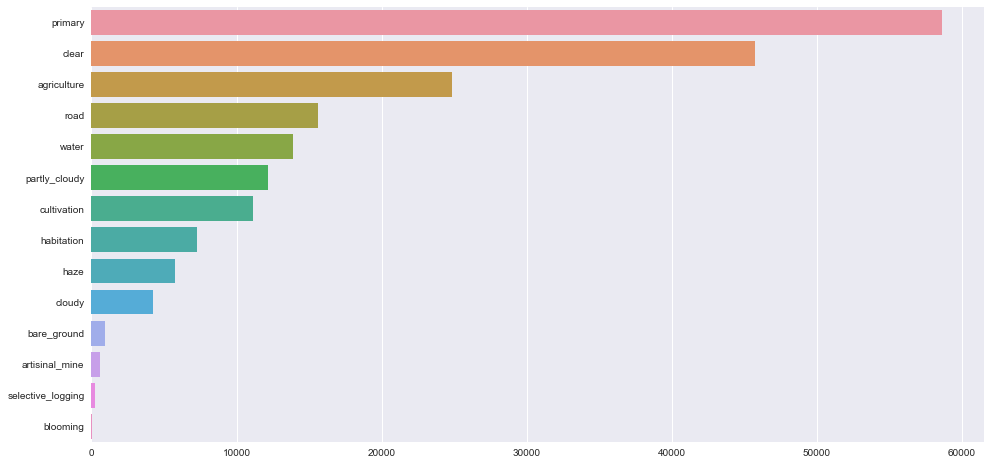

In [14]:
"""
This code block will plot a horizontal bar plot of the predicted labels
"""

tags_s = pd.Series(list(chain.from_iterable(predicted_labels))).value_counts()
fig, ax = plt.subplots(figsize=(16, 8))
sns.barplot(x=tags_s, y=tags_s.index, orient='h');
plt.show()

In [15]:
"""
This line will create final submission file for Kaggle for scoring the prediction
"""
final_df.to_csv('submission_file.csv', index=False)